In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

# 1 Excercise 1 Bayes Theorem Applications

Bayes’ theorem is fundamental for updating beliefs with new evidence and forms the foundation
of Bayesian statistics and machine learning

## 1.1 Part (a): Quality Control in Manufacturing


Task: A semiconductor manufacturing company uses three different production lines (A, B, and
C) to produce microchips. Apply Bayes’ theorem to analyze defect patterns and production
optimization.
Given Information:
- Production line A produces 50% of all chips
-  Production line B produces 30% of all chips
- Production line C produces 20% of all chips
- Defect rates: Line A has 2% defective chips, Line B has 3% defective, Line C has 1%
defective
- A quality inspector randomly selects chips for testing without knowing which line produced
them

**Questions**

1. If a randomly selected chip is defective, what is the probability it came from line A?


**Law of Total Probability**
$$
P(A) = \sum_n P(A | B_n)P(B_n) = P(A \cap B_n) \\
$$

**Bayes Theorem**
$$
P(A|B) = \frac{P(B|A_i)P(A_i)}{\sum_{j=1}^NP(B|A_j)P(A_j)}
$$

Need to basically calculate 
P of comming from lineA if it is nok = P of being nok if it comes from lineA / TotalProbability of bing nok comming from any line

$$
P(A|B) = \frac{0.02*0.5}{0.02*0.5+0.03*0.3+0.01*0.2} = 0.4761904761904763
$$
- A : from which production line it comes from
- B : Being NOK

2. If a randomly selected chip is defective, what is the probability it came from line B?


$$
P(A|B) = \frac{0.03*0.3}{0.02*0.5+0.03*0.3+0.01*0.2} = 0.4285714285714286
$$

3. If a randomly selected chip is defective, what is the probability it came from line C?


$$
P(A|B) = \frac{0.01*0.2}{0.02*0.5+0.03*0.3+0.01*0.2} = 0.09523809523809525
$$

4. Which production line should be investigated first when defective chips are found?


Production line A. Even though the lines defect rate is lower than line B's, because it produces more, the absolute number of defective pieces coming from it is the highest from all three lines

5. What is the overall defect rate across all production lines?


It is given by the law of total probability. Sum of all branches in which a nok part can occur.
$$
P_{nok}=0.02*0.5+0.03*0.3+0.01*0.2 = 0.02099999
$$

6. Interpret the results for production management decisions


If they want to lower the number of defektive parts, it is most effective to try to lower line A's defect rate because it produces the most

7. Explain why the line with highest defect rate might not be the most likely source

If line A has defect rate 80% and produces 10 parts then it produces on average 8 defective parts. Now if line B has defect rate 20% and produces 100 parts, then it has significantly lower defect rate but it will still produce 20 defective parts which is higher than the 8 by line A. So not only the rate matters but also the amount produced

## 1.2 Part (b): Network Security Intrusion Detection
**Task**: A cybersecurity system monitors network traffic to detect potential intrusions. The system
uses Bayesian analysis to classify network connections as either normal traffic or potential attacks.

**Given Information**:
- In a typical day, 5% of network connections are actual attack attempts
- The intrusion detection system has three alert levels:
  - **High Alert**: Triggered by 85% of actual attacks, but also by 2% of normal traffic
  - **Medium Alert**: Triggered by 60% of actual attacks, but also by 8% of normal traffic
  - **Low Alert**: Triggered by 30% of actual attacks, but also by 15% of normal traffic
- Multiple alerts can be triggered simultaneously for the same connection


Again **Bayes Theorem**
$$
P(A_i|B)= \frac{P(B|A_i)P(A_i)}{\sum_{j=1}^N P(B|A_j)P(A)}
$$

- A = Attack
- H = High Alert
- M = Medium Alert
- L = Low Alert

**Questions**:
1. If the system triggers a High Alert, what is the probability that it’s an actual attack?

$$
\begin{aligned}
P(A|H) &= \frac{P(H|A)P(A)}{P(H|A)P(A) + P(H|\bar{A})P(\bar{A})} \\
&= \frac{0.85\cdot 0.05}{0.85\cdot 0.05 + 0.02\cdot 0.95} \\
&=0.691
\end{aligned}
$$

2. If the system triggers a Medium Alert, what is the probability that it’s an actual attack?

$$
\begin{aligned}
P(A|M) &= \frac{P(M|AP(A)}{P(M|P(A) + P(M|\bar{A})P(\bar{A})} \\
&= \frac{0.6\cdot 0.05}{0.6\cdot 0.05 + 0.08\cdot 0.95} \\
&= 0.283
\end{aligned}
$$

3. If the system triggers both High and Medium alerts simultaneously, what is the probability
of an actual attack? (Assume alert independence given the connection type)


First, since  the alerts are independent we can calculate the simultaneous alert probability
In the non conditional case this is
$$
P(H \cap M) = P(H) \cdot P(M) 
$$
And for conditional probabilities (which we need)
$$
P(H \cap M | A) = P(H | A) \cdot P(M | A) = 0.85\cdot0.6 = 0.51 \\
P(H \cap M | \bar{A}) = P(H | \bar{A}) \cdot P(M | \bar{A}) = 0.02\cdot0.08 = 0.0016
$$
IF they were not independent it would be
$$
P(H \cap M | A) = P(H | A) + P(M | A) - P(H \cup M | A)
$$
And so again using Bayes Theorem
$$
\begin{aligned}
P(A|H \cap M) &= \frac{P(H \cap M|A)P(A)}{P(H \cap M|A)P(A) + P(H \cap M|\bar{A})P(\bar{A})} \\
&= \frac{0.51\cdot 0.05}{0.51\cdot 0.05 + 0.0016\cdot 0.95} \\
&= 0.94374
\end{aligned}
$$

4. A security analyst wants to minimize false alarms while catching most attacks. Which alert
level provides the best balance?

Should do precision, recall analysis
- High: Precision = 0.691, Recall = 0.85 
- Medium:Precision = 0.28, Recall = 0.6
- Low: Recall = 0.3
- High is best precision and recall overall

5. If no alerts are triggered, what is the probability the connection is actually an attack?

so if it is an attack what is the probability that non are triggered
$$
P(A|\bar{H} \cap \bar{M} \cap \bar{L})
$$
We need to consider all cases where no alarm is given
$$
\begin{aligned}
P(\bar{H} \cap \bar{M} \cap \bar{L}|A) &= P(\bar{H}|A) \cdot P(\bar{M}|A) \cdot P(\bar{L}|A) \\
&=0.15 \cdot 0.4 \cdot 0.7 = 0.042 \\
P(\bar{H} \cap \bar{M} \cap \bar{L}|\bar{A}) &= P(\bar{H}|\bar{A}) \cdot P(\bar{M}|\bar{A}) \cdot P(\bar{L}|\bar{A}) \\
&=0.98 \cdot 0.92 \cdot 0.85 = 0.766
\end{aligned}
$$
Law of total probability to get the probability of no alert 
$$
P(\bar{H} \cap \bar{M} \cap \bar{L}) = 0.042 * 0.05 + 0.766*0.95=0.7298
$$
Now if there is no alert, what percentage of these are actually attacks
$$
P(A|\bar{H} \cap \bar{M} \cap \bar{L}) = \frac{0.042*0.05}{0.7298}= 0.00288
$$

**Takeaway:** 
1. Clearly define all relevant events and their probabilities
2. Define what you need to find in terms of these events
3. Think logically through them

## 2 Exercise 2: Probability Transformations
Understanding how transformations affect probability distributions is crucial for statistical modeling and machine learning.

### 2.1 Part (a): Logarithmic Transformation of Exponential Distribution


**Task** Find the probability distribution of $Y = \log(X)$ when $X \sim  \text{Exp}(\lambda)$

**Mathematical Setup**
- Start with $X \sim Exp(\lambda)$ so $f_X(x) = \lambda \exp(-\lambda x)$ for $x > 0$ 
- define the transformation $Y = \log(X)$
- Find the probability density function $f_Y(y)$

We start with an exponential distribution
If
$X \sim \text{Exp}(\lambda)$
What is the distribution of
$$
Y=\log(X)
$$

For the exponential distribution we have the pdf
**PDF of X**
$$
f_X(x) = \lambda \exp(-\lambda x)
$$
 for $x > 0$ 

 For that we have to find the PDF of $Y=\log(X)$

 **PDF of Y=log(X)**

$$
\begin{aligned}
g(X) &= Y = \log(X) \\
g^{-1}(y) &= \exp(y) \\
f_Y(y) &= f_X(g^{-1}(y)) \ |\frac{d}{dy g^{-1}(y)}| \\
&=\lambda \exp(-\lambda \exp(y)) \ |\exp(y)| \\
&= \lambda \exp(y- \lambda \exp(y))
\end{aligned}
$$


$$
\begin{aligned}
f_Y(y)= f_X(g^{-1}(y)) \ |\frac{d}{dy}g^{-1}(y)|

\end{aligned}
$$



*Apparently* this is the gumbel distribution

### Part (b): Properties of the Transformed Distribution

**Task**: Analyze the properties of the transformed distribution.

1. Calculate E[Y ] and Var(Y ) for Y = log(X) where X ∼ Exp(λ)


$$
\begin{aligned}
E[Y] = 
\end{aligned}
$$

$$
\begin{aligned}
Var[Y] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
\end{aligned}
$$

# How to calculate this

2. Compare the shape of the original exponential distribution with the transformed distribu-
tion

Original: Right skewed, support 0, infty
Transformed Y = logX Gumbel distr. sup -infty,infty  heavier left tail (why? explain)

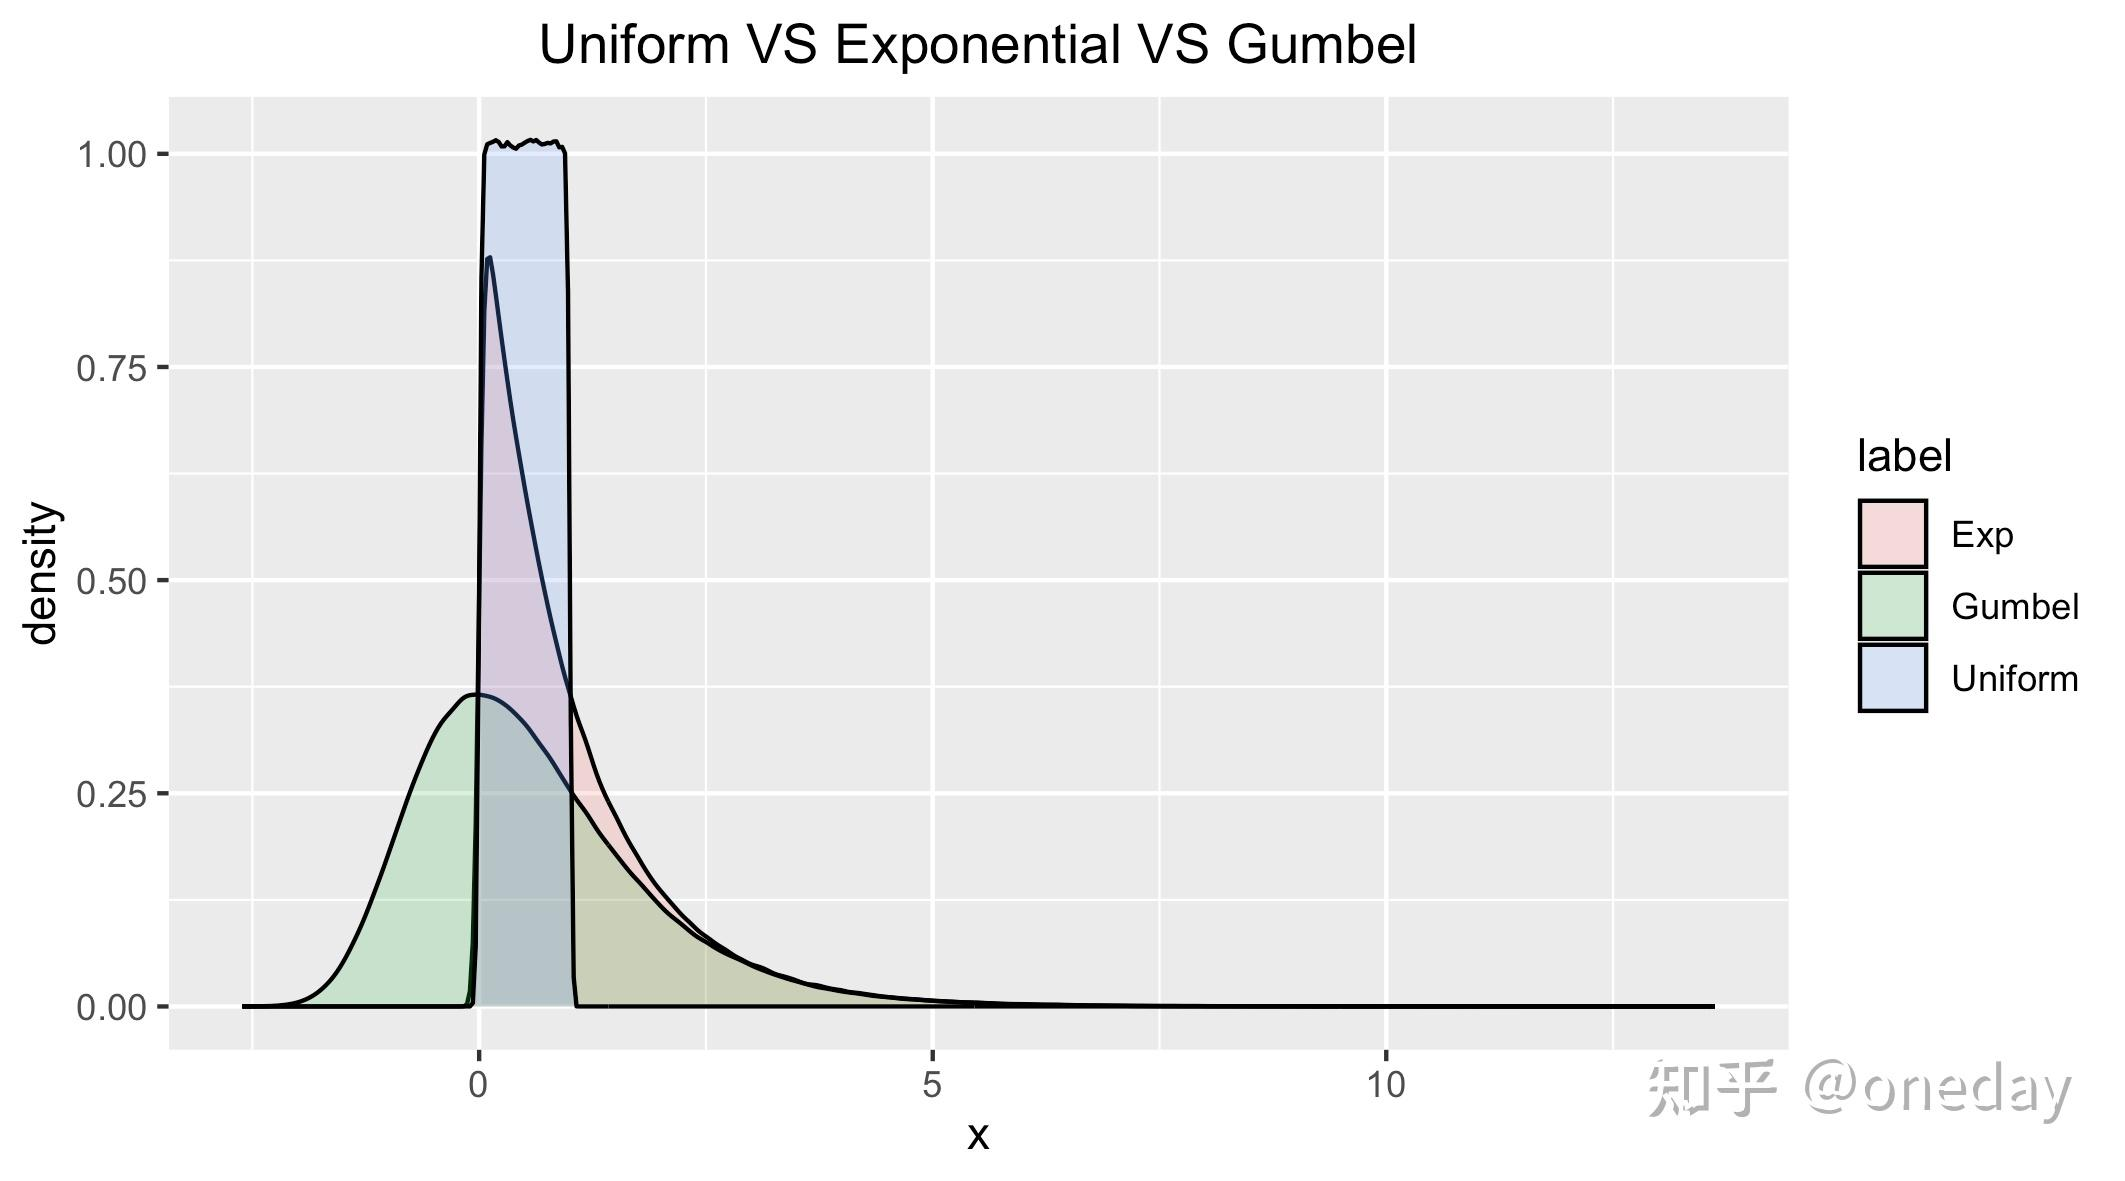

3. Explain why this transformation might be useful in practice

Used to model the distribution of the maximum of a number of samples of various distributions.
Might be the maximum level of a river in a particular year. if we have a list of maximum values for the last few years.

usefull for predicting the chance that an extreme event will occur.

## 3 Exercise 3: Linear Transformations of Student-t Distribution
The Student-t distribution is fundamental in statistical inference, especially when dealing with
small samples or unknown population variance.

### 3.1 Part (a): Student-t Distribution Properties

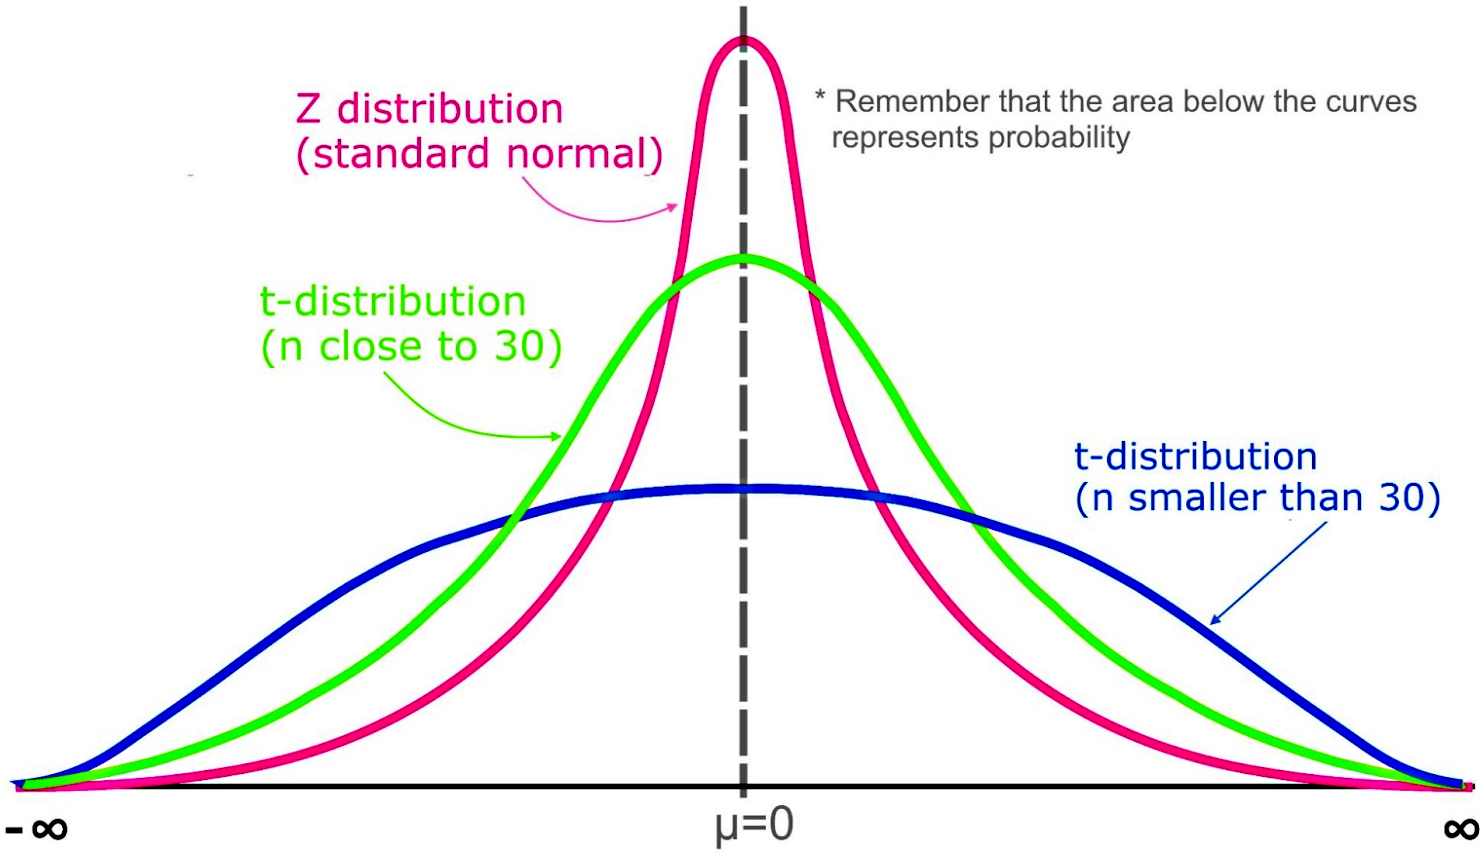

**Task**: Work with the moments of the Student-t distribution and linear transformations.

**Given Information**: For X ∼ $t_\nu$ (Student-t with $\nu$ degrees of freedom):
- $\mathbb{E}[X] = 0$ for $\nu >1$
- $Var(X) = \frac{\nu}{\nu-2}$ for $\nu >2$
- Distribution undefined for $\nu \leq 0$, has finite variance for $\nu \leq 2$
- Aa $\nu \rightarrow \infty, t_\nu \rightarrow \mathcal{N}(0,1)$ with increasing degrees of freedom the student t distribution converges to the standard normal distribution

1. For X ∼ $t_5$, calculate E[X] and Var(X)

$$
\mathbb{E}[X] = 0
$$

$$
Var(X) = \frac{5}{5-2} = 5/3
$$

2. For X ∼ $t_{10}$, calculate E[X] and Var(X)

$$
\mathbb{E}[X] = 0 \\
$$
$$
Var(X) = \frac{10}{10-2} = 10/8
$$

3. Compare these results with the standard normal distribution N (0, 1)

has E[X] = 0 and Var(X) = 1
E[X] is already the same from the start.

Var(X) converges to 1 as $\nu$ increases

### 3.2 Part (b): Linear Transformation Analysis

**Task**: Analyze the linear transformation $Y = aX + b$ where X ∼ $t_\nu$ .

1. For $Y = 3X + 5$ where $X \sim t_8$


$E[Y] = 3\cdot 0 + 5 = 5$

$Var(Y) = 3^2 \cdot \frac{8}{8-2} = 12$

$SD(Y) = \sqrt{Var(Y)} = \sqrt(12)=3.464$

2. For Y = −2X + 10 where X ∼ t15, calculate:
$$
\begin{align}
E[Y] &= -2\cdot 0 +10 = 10\\
Var[Y] &= (-2)^2 \cdot \frac{15}{13} = \frac{60}{13} = 4.61\\
SD[Y] &= \sqrt{Var(Y)} = \sqrt{60/13} = 2.14
\end{align}
$$

3. Explain why Y does not follow a Student-t distribution (except in special cases)

student t is centered around 0 with mean 0, so unless the transformed distribution is also at mean 0 it is not a student t distribution